# Fold

In [16]:
import pickle
import glob

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from PyAstronomy.pyasl import foldAt

In [17]:
with open("lc/lc.pkl", "rb") as fp:
    data = pickle.load(fp)

In [67]:
def extend_lc(time, mag, error, n=2):
    e_time, e_mag, e_error = time[:], mag[:], error[:]
    for m in range(1, n):
        e_time = np.hstack((e_time, time + m))
        e_mag = np.hstack((e_mag, mag))
        e_error = np.hstack((e_error, error))
    return e_time, e_mag, e_error


def plot_phase(sid, p0, p1, axs):
    
    sob = data[sid]
    time, mag, err = sob["time"], sob["magnitude"], sob["error"]
    
    sort = np.argsort(time)
    time, mag, err = time[sort], mag[sort], err[sort]
    
    color, ecolor = "#8a8a8a", "#bababa"
    
    ax = axs[0]
    ax.errorbar(time, mag, err, marker="o", linestyle="", color=color, ecolor=ecolor)
    ax.set_xlabel("HJD")
    ax.set_ylabel("Magnitude")
    ax.invert_yaxis()
    ax.set_title(sid)
    
    ax = axs[1]
    t0 = time[np.argmin(mag)]

    phases0 = foldAt(time, p0, T0=t0)    
    sort = np.argsort(phases0)
    phases0, mag0, err0 = phases0[sort], mag[sort], err[sort]
    phases0, mag0, err0 = extend_lc(phases0, mag0, err0, 2)
    
    ax.errorbar(phases0, mag0, err0, marker="o", linestyle="", color=color, ecolor=ecolor)
    ax.set_ylabel("Magnitude")
    ax.set_xlabel("Phase")
    ax.invert_yaxis()
    ax.set_title("Folded with period {} days".format(p0))
    
    ax = axs[2]

    phases1 = foldAt(time, p1, T0=t0)    
    sort = np.argsort(phases1)
    phases1, mag1, err1 = phases1[sort], mag[sort], err[sort]
    phases1, mag1, err1 = extend_lc(phases1, mag1, err1, 2)
    
    ax.errorbar(phases1, mag1, err1, marker="o", linestyle="", color=color, ecolor=ecolor)
    ax.set_ylabel("Magnitude")
    ax.set_xlabel("Phase")
    ax.invert_yaxis()
    ax.set_title("Folded with period {} days".format(p1))

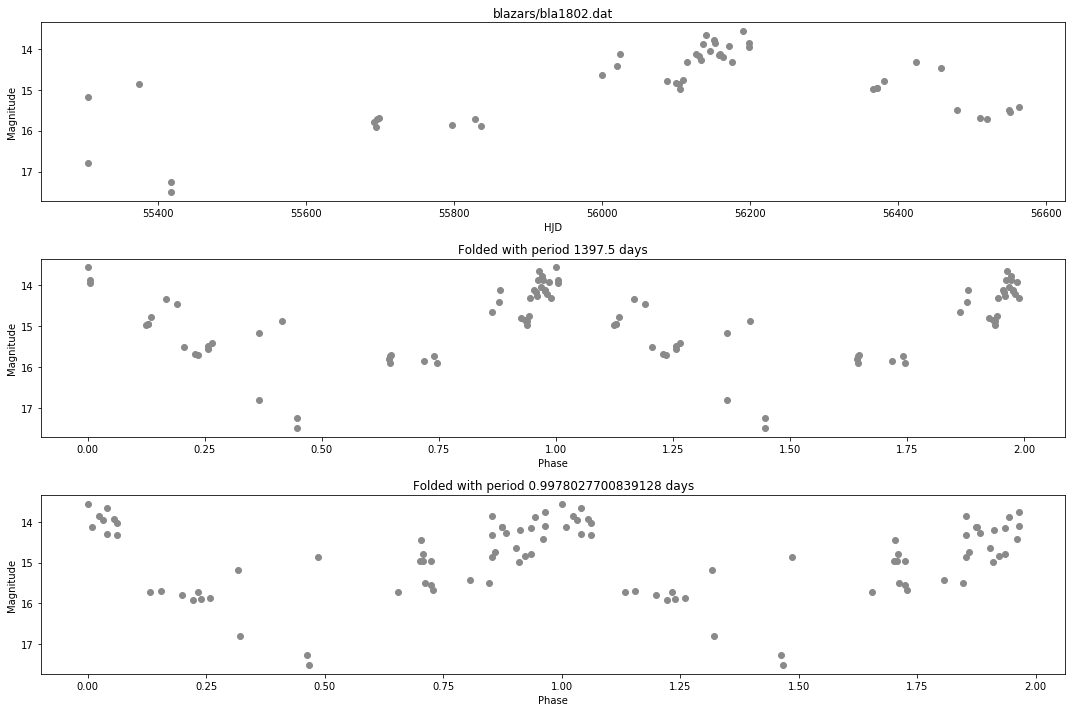

In [69]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
plot_phase("blazars/bla1802.dat", 1397.5, 0.9978027700839128, axes)

fig.tight_layout()

In [28]:
list(map(np.shape, data["blazars/bla1802.dat"].values()))

[(49,), (49,), (49,)]